#Loading the Keyword Data

In [1]:
#Calling libraries
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Retrieving files
urllib.request.urlretrieve("https://raw.githubusercontent.com/SisonkeBiotik-Africa/AfriBioML/main/CSV/refinedkeywords_final_ultrageneralization.csv", "refinedkeywords_final.csv")

('refinedkeywords_final.csv', <http.client.HTTPMessage at 0x7fc987c5f400>)

In [3]:
#Creating dataframes
df = pd.read_csv("refinedkeywords_final.csv", sep=";")

In [4]:
df.shape

(46292, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46292 entries, 0 to 46291
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Keyword          46292 non-null  object
 1   Class            46292 non-null  object
 2   EID              46292 non-null  object
 3   Year             46292 non-null  int64 
 4   Highly Cited     46292 non-null  bool  
 5   North Africa     46292 non-null  bool  
 6   OA               46292 non-null  bool  
 7   Journal Article  46292 non-null  bool  
dtypes: bool(4), int64(1), object(3)
memory usage: 1.6+ MB


#Keyword mentions per class

Text(0, 0.5, 'Class')

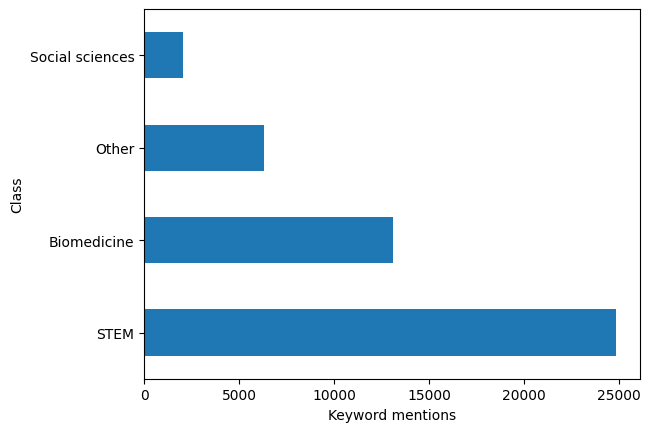

In [49]:
df["Class"].value_counts().plot(kind='barh');
plt.xlabel("Keyword mentions")
plt.ylabel("Class")

#Main keywords per class

In [7]:
df["Class"].unique()

array(['STEM', 'Biomedicine', 'Other', 'Social sciences'], dtype=object)

Text(0, 0.5, 'Keyword')

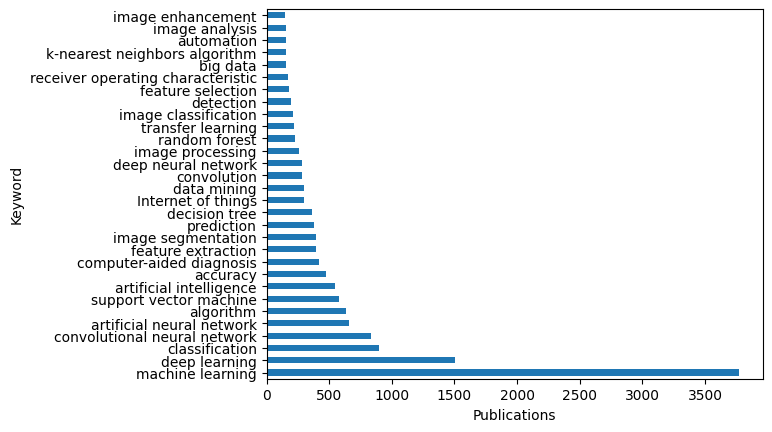

In [50]:
df[df["Class"] == "STEM"]["Keyword"].value_counts()[0:30].plot(kind="barh");
plt.xlabel("Publications")
plt.ylabel("Keyword")

Text(0, 0.5, 'Keyword')

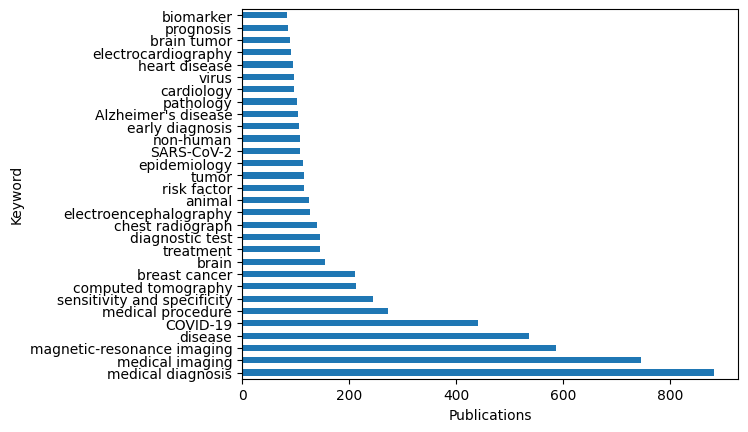

In [51]:
df[df["Class"] == "Biomedicine"]["Keyword"].value_counts()[0:30].plot(kind="barh");
plt.xlabel("Publications")
plt.ylabel("Keyword")

Text(0, 0.5, 'Keyword')

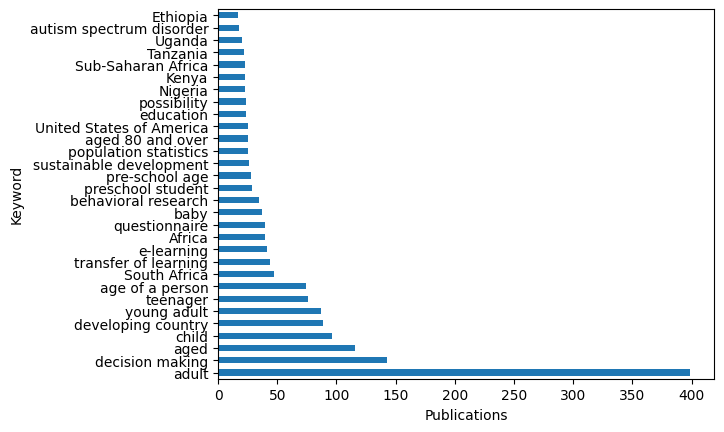

In [52]:
df[df["Class"] == "Social sciences"]["Keyword"].value_counts()[0:30].plot(kind="barh");
plt.xlabel("Publications")
plt.ylabel("Keyword")

Text(0, 0.5, 'Keyword')

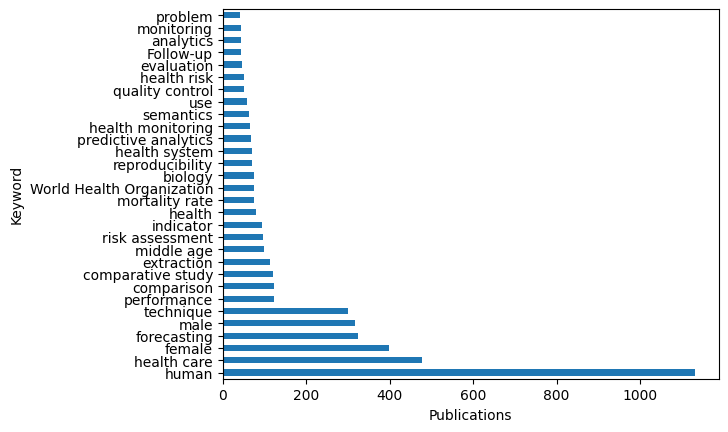

In [53]:
df[df["Class"] == "Other"]["Keyword"].value_counts()[0:30].plot(kind="barh");
plt.xlabel("Publications")
plt.ylabel("Keyword")

#Class mentions and condition

Text(0.5, 0, 'Percentage')

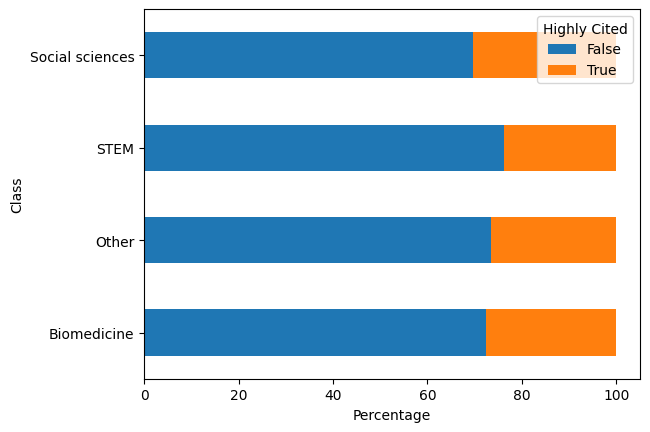

In [54]:
df.groupby(['Class'])['Highly Cited'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);
plt.xlabel("Percentage")

Text(0.5, 0, 'Percentage')

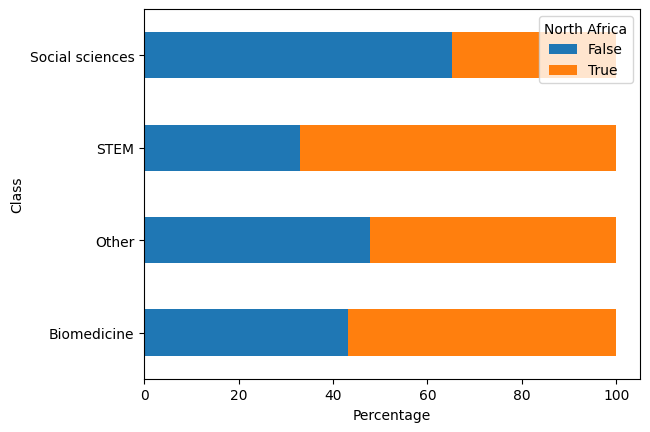

In [55]:
df.groupby(['Class'])['North Africa'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);
plt.xlabel("Percentage")

Text(0.5, 0, 'Percentage')

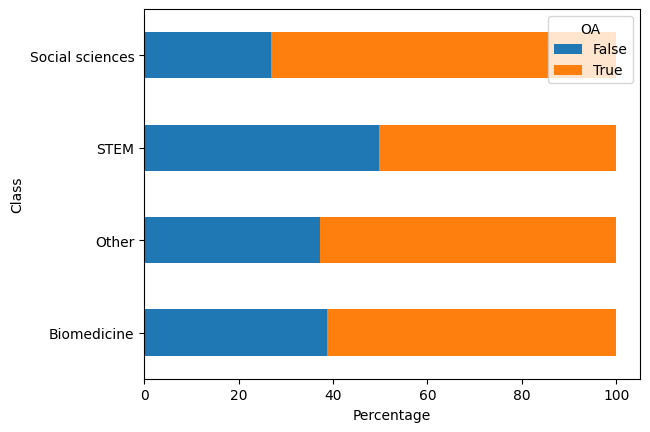

In [56]:
df.groupby(['Class'])['OA'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);
plt.xlabel("Percentage")

Text(0.5, 0, 'Percentage')

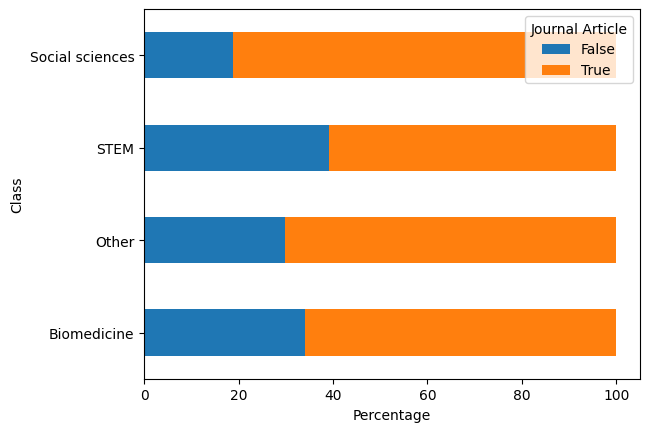

In [57]:
df.groupby(['Class'])['Journal Article'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);
plt.xlabel("Percentage")

Text(0.5, 0, 'Percentage')

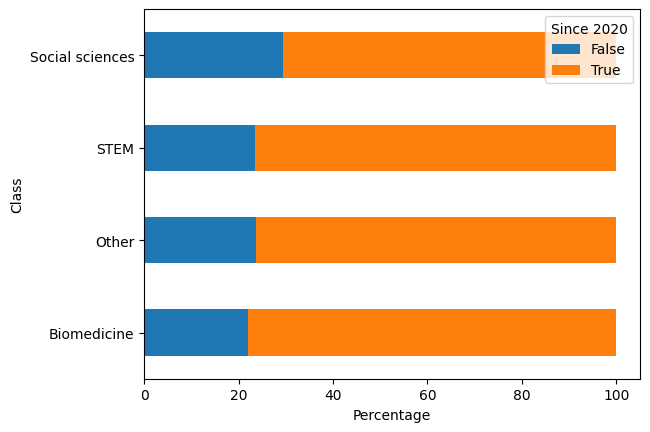

In [58]:
df["Since 2020"] = df["Year"] >= 2020
df.groupby(['Class'])['Since 2020'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True);
plt.xlabel("Percentage")

#Keyword per class and condition

In [90]:
def keywordpercondition(classname, condition, ax):
  best = df[df["Class"] == classname]["Keyword"].value_counts()[0:30].index.tolist()
  best.reverse()
  df[df["Class"] == classname].groupby(['Keyword'])[condition].value_counts(normalize=True).loc[best,:].mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=ax);
  plt.xlabel("Percentage")

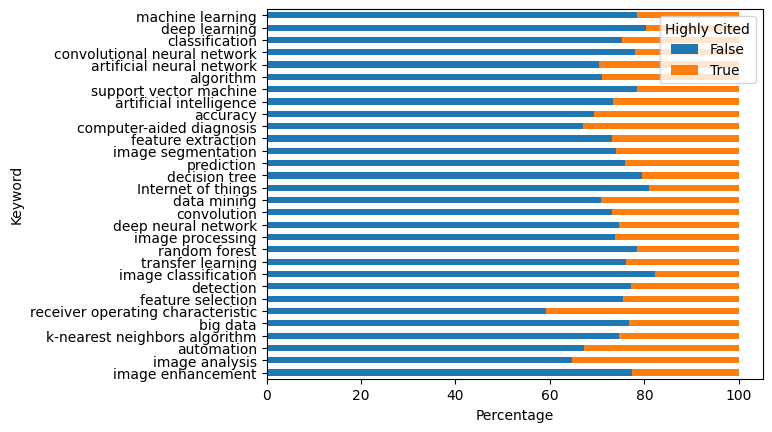

In [44]:
keywordpercondition("STEM", "Highly Cited")

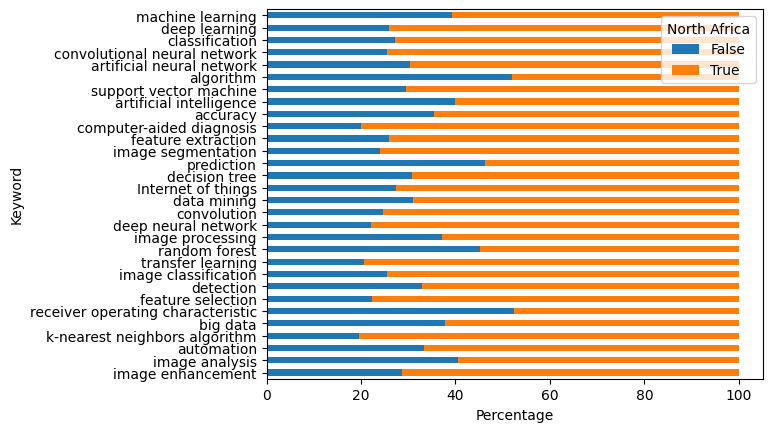

In [45]:
keywordpercondition("STEM", "North Africa")

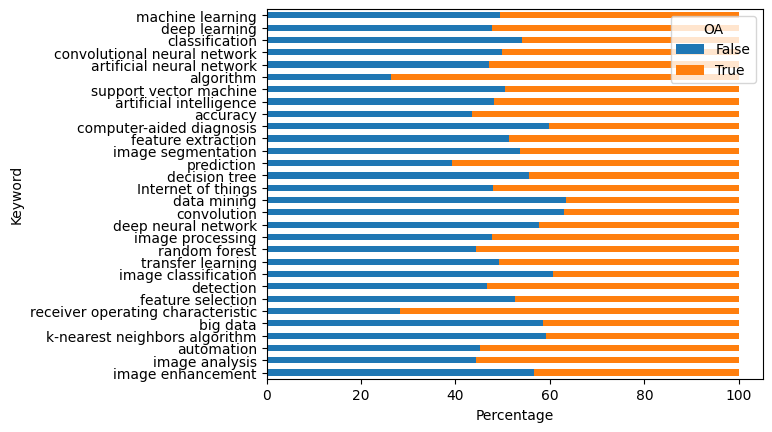

In [46]:
keywordpercondition("STEM", "OA")

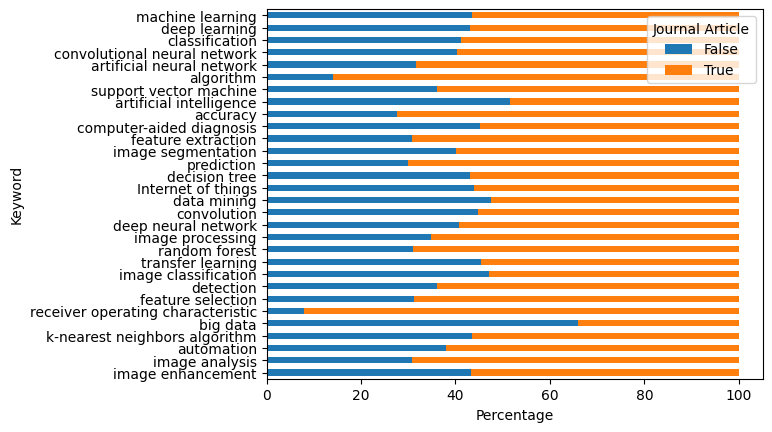

In [47]:
keywordpercondition("STEM", "Journal Article")

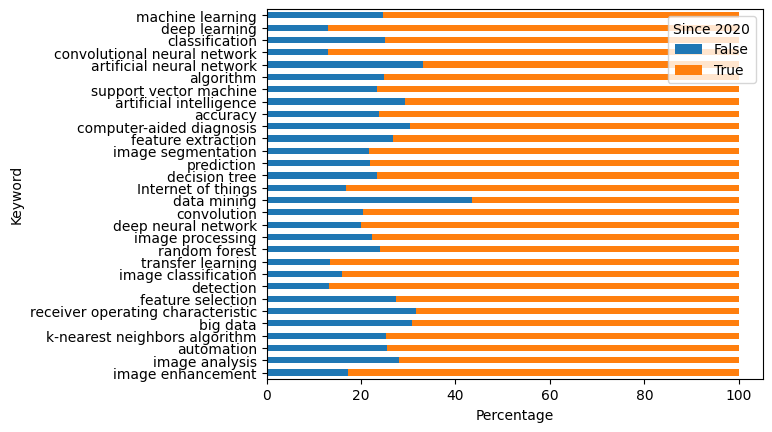

In [48]:
keywordpercondition("STEM", "Since 2020")

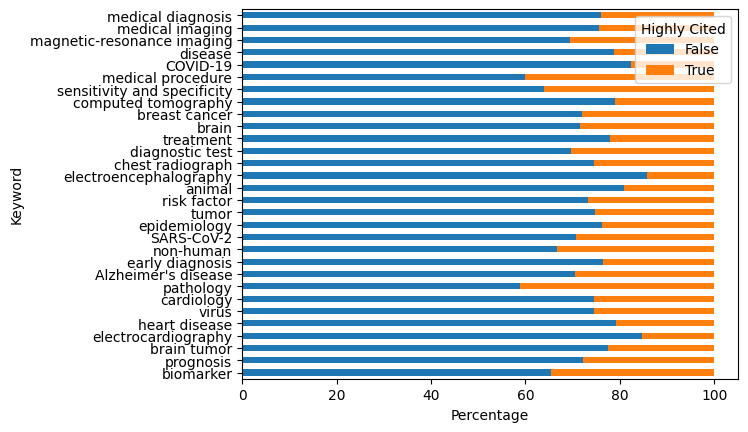

In [59]:
keywordpercondition("Biomedicine", "Highly Cited")

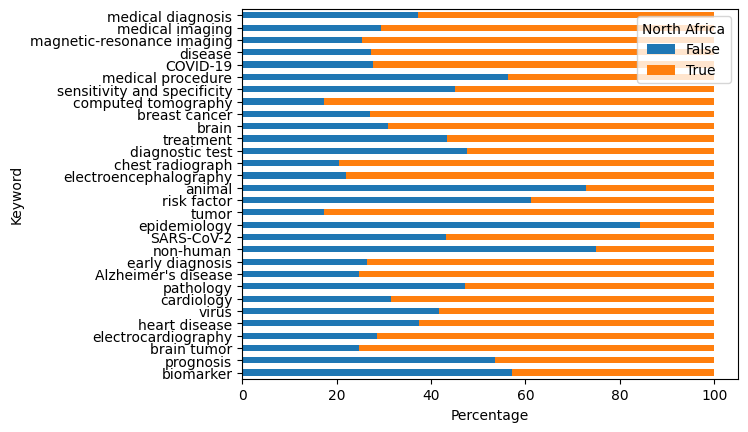

In [60]:
keywordpercondition("Biomedicine", "North Africa")

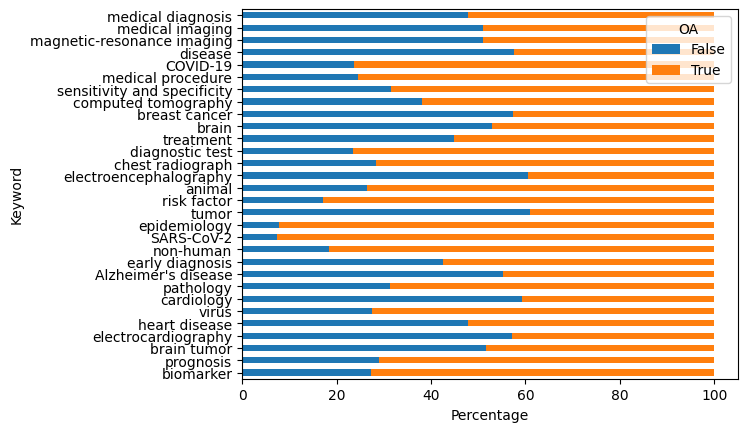

In [61]:
keywordpercondition("Biomedicine", "OA")

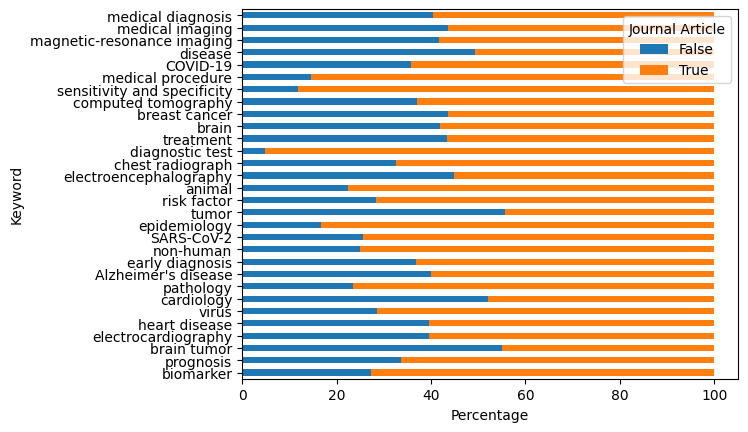

In [62]:
keywordpercondition("Biomedicine", "Journal Article")

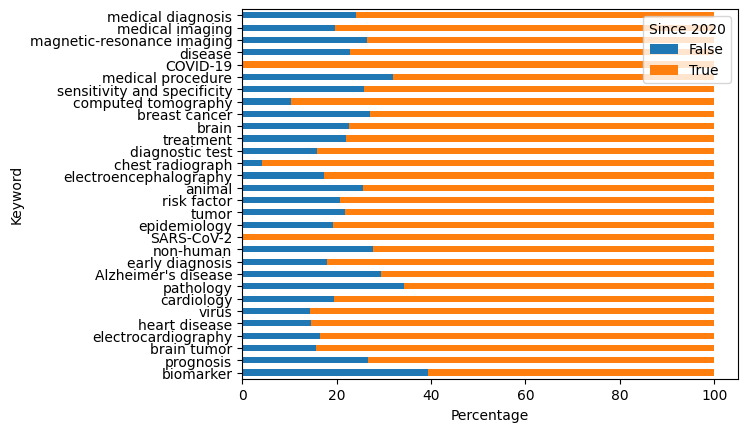

In [63]:
keywordpercondition("Biomedicine", "Since 2020")

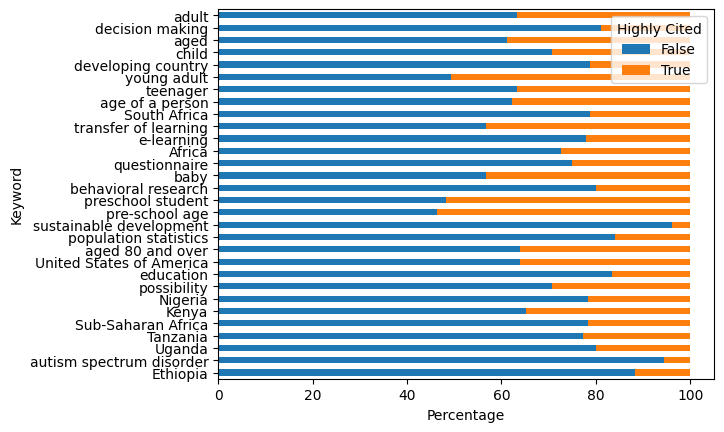

In [64]:
keywordpercondition("Social sciences", "Highly Cited")

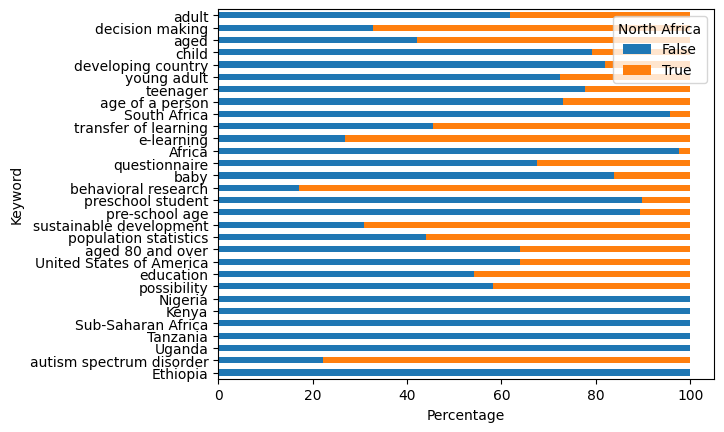

In [65]:
keywordpercondition("Social sciences", "North Africa")

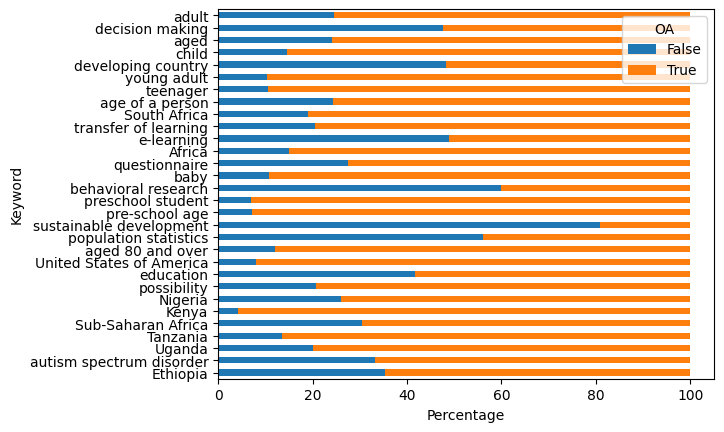

In [66]:
keywordpercondition("Social sciences", "OA")

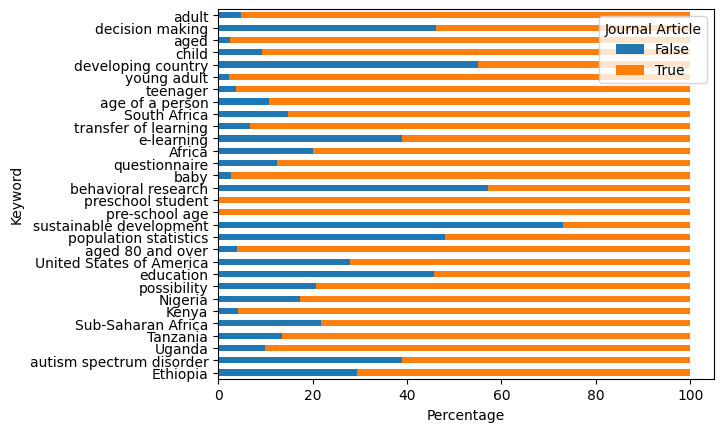

In [67]:
keywordpercondition("Social sciences", "Journal Article")

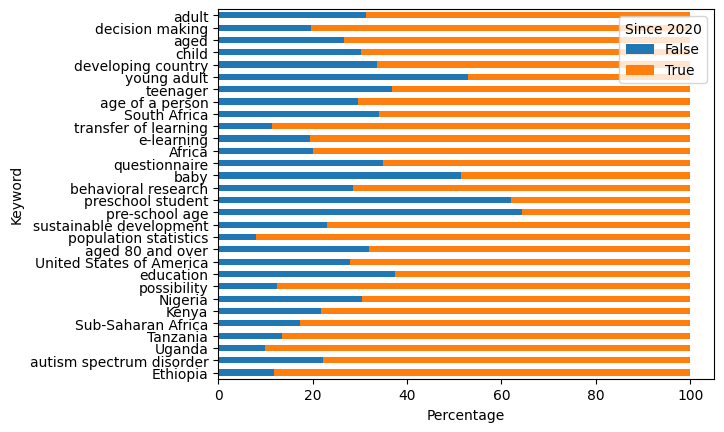

In [68]:
keywordpercondition("Social sciences", "Since 2020")

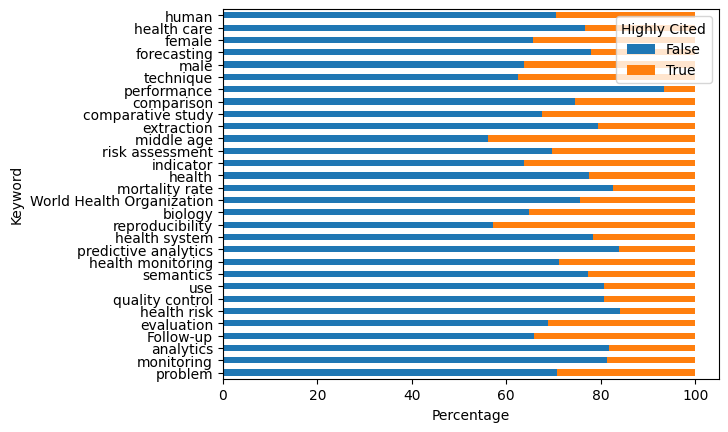

In [69]:
keywordpercondition("Other", "Highly Cited")

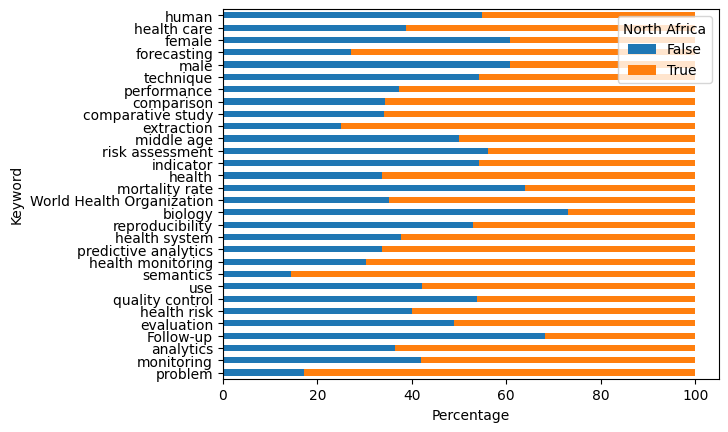

In [70]:
keywordpercondition("Other", "North Africa")

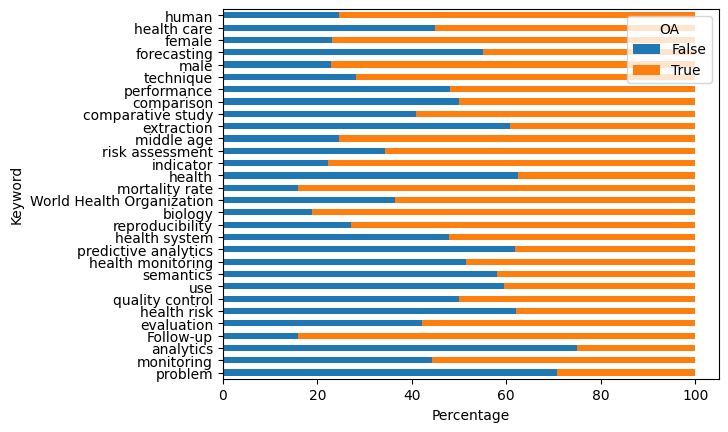

In [71]:
keywordpercondition("Other", "OA")

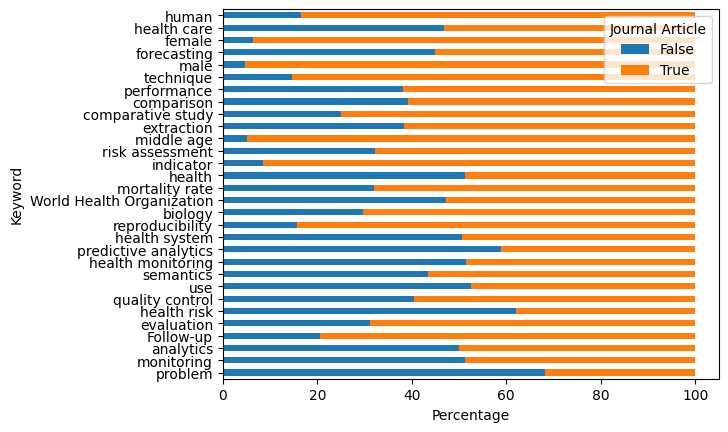

In [72]:
keywordpercondition("Other", "Journal Article")

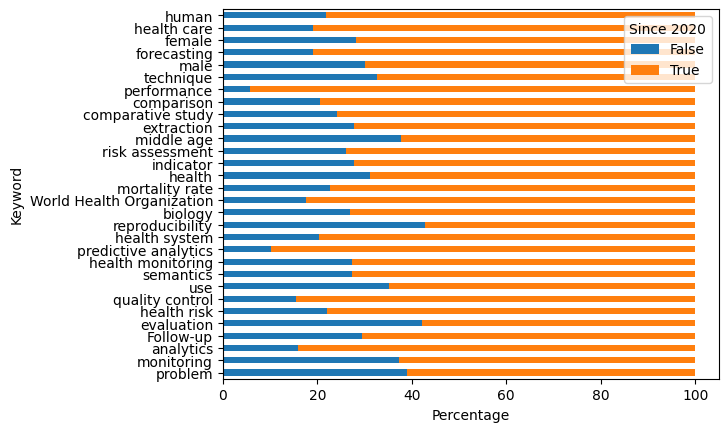

In [73]:
keywordpercondition("Other", "Since 2020")

# Plots

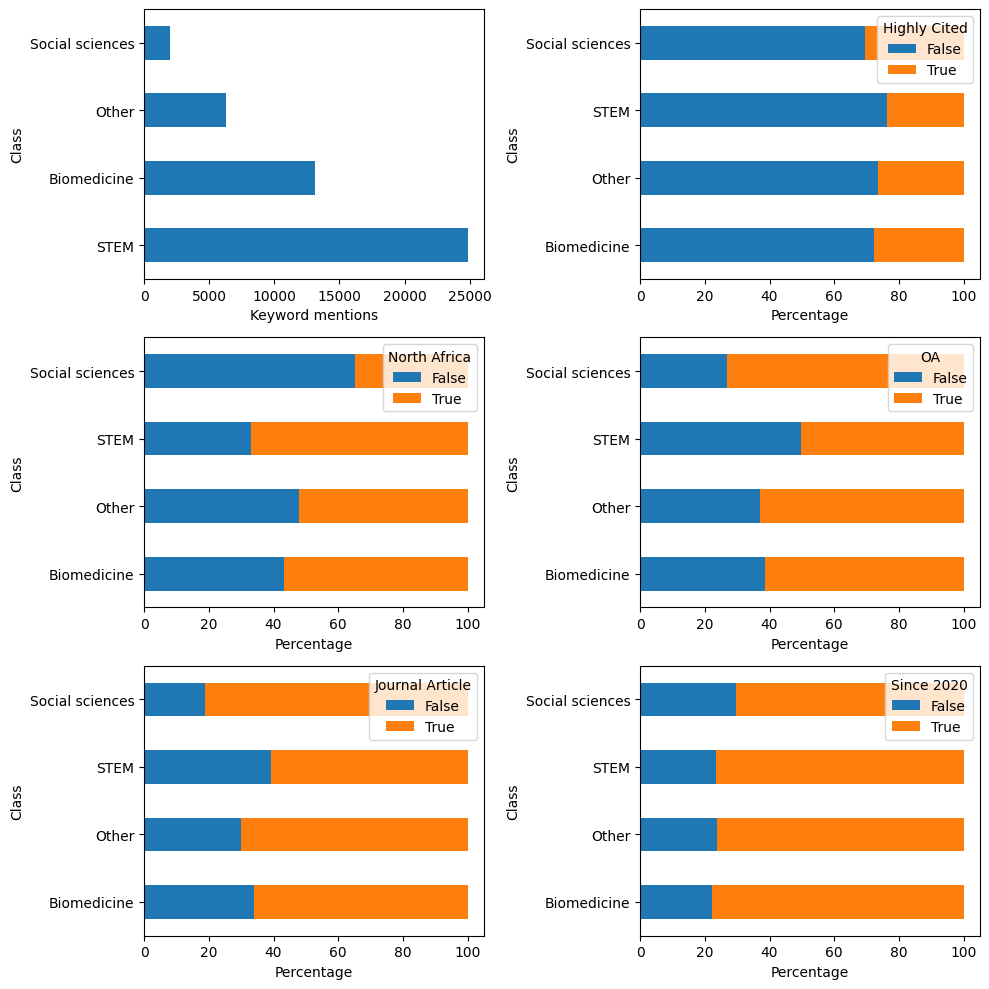

In [87]:
fig, axs = plt.subplots(3, 2, figsize= (10, 10))
df["Class"].value_counts().plot(kind='barh', ax=axs[0,0]);
axs[0,0].set_xlabel("Keyword mentions")
axs[0,0].set_ylabel("Class")

df.groupby(['Class'])['Highly Cited'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[0,1]);
axs[0,1].set_xlabel("Percentage")

df.groupby(['Class'])['North Africa'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[1,0]);
axs[1,0].set_xlabel("Percentage")

df.groupby(['Class'])['OA'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[1,1]);
axs[1,1].set_xlabel("Percentage")

df.groupby(['Class'])['Journal Article'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[2,0]);
axs[2,0].set_xlabel("Percentage")

df.groupby(['Class'])['Since 2020'].value_counts(normalize=True).mul(100).round(1).unstack(level=1).plot(kind='barh', stacked=True, ax=axs[2,1]);
axs[2,1].set_xlabel("Percentage")

plt.tight_layout()  # makes that labels etc. fit nicely
plt.show()

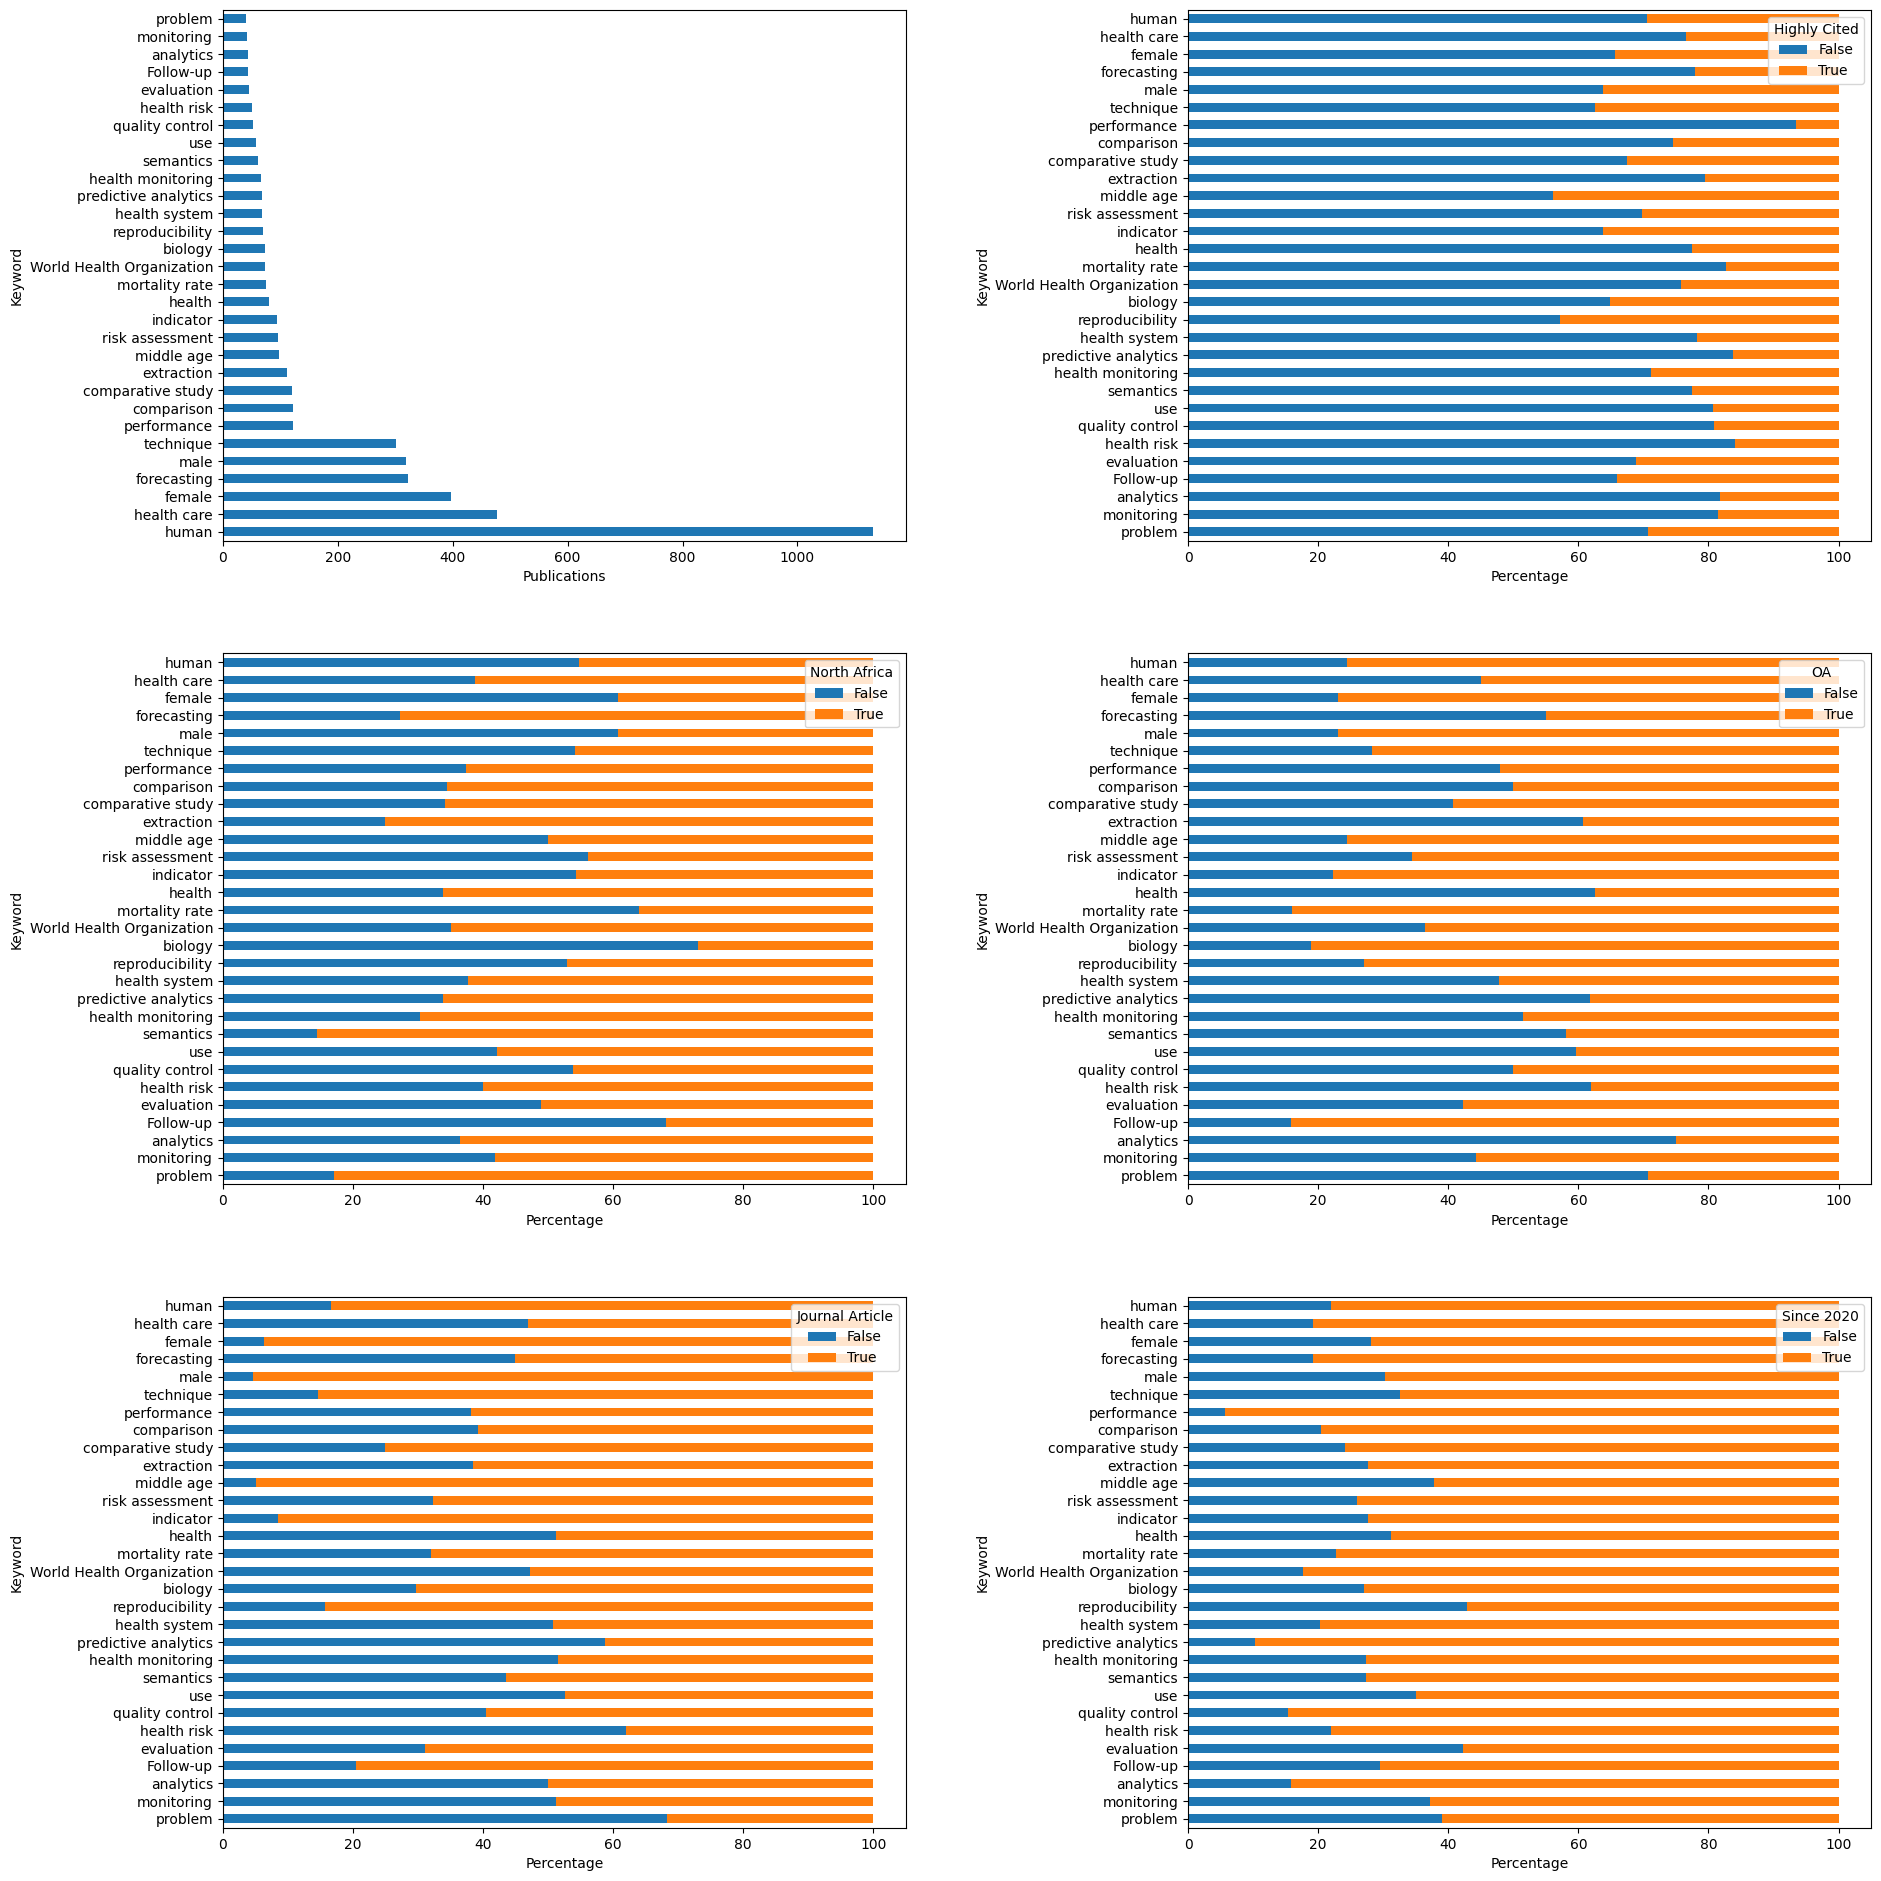

In [97]:
class1 = "Other"
fig, axs = plt.subplots(3, 2, figsize= (20, 20))
df[df["Class"] == class1]["Keyword"].value_counts()[0:30].plot(kind="barh", ax=axs[0,0]);
axs[0,0].set_xlabel("Publications")
axs[0,0].set_ylabel("Keyword")

keywordpercondition(class1, "Highly Cited", ax=axs[0,1])
axs[0,1].set_xlabel("Percentage")

keywordpercondition(class1, "North Africa", ax=axs[1,0])
axs[1,0].set_xlabel("Percentage")

keywordpercondition(class1, "OA", ax=axs[1,1])
axs[1,1].set_xlabel("Percentage")

keywordpercondition(class1, "Journal Article", ax=axs[2,0])
axs[2,0].set_xlabel("Percentage")

keywordpercondition(class1, "Since 2020", ax=axs[2,1])
axs[2,1].set_xlabel("Percentage")

plt.tight_layout(pad=5.0)  # makes that labels etc. fit nicely
plt.show()